In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [18]:
pf = pd.read_csv('creditcard.csv', on_bad_lines='skip')

<ipython-input-18-40f345833a9e>:1: DtypeWarning: Columns (2,4,5,9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  pf = pd.read_csv('creditcard.csv', on_bad_lines='skip')


In [19]:
pf.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.0727811733098497,2.536347,1.37815522427443,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.26615071205963,0.166480,0.448154078460911,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.34016307473609,1.773209,0.379779593034328,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226008082898,1.792993,-0.863291275036453,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877736754848451,1.548718,0.403033933955121,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [20]:
pf.describe()

,Time,V1,V3,V6,V7,V8,V10,V11,V12,V13,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1.585370e+05,158537.000000,158537.000000,158537.000000,158537.000000,158537.000000,158532.000000,158531.000000,158531.000000,158531.000000,...,158522.000000,158519.000000,158519.000000,158517.000000,158513.000000,158508.000000,158504.000000,158503.000000,158500.000000,158497.000000
mean,2.191582e+11,-0.262663,0.664202,0.092669,-0.114229,0.062326,-0.019900,0.243129,-0.044181,-0.013183,...,-0.028064,-0.103265,-0.035111,0.009095,0.137741,0.021644,0.003604,0.003361,100.399934,0.002297
std,8.726157e+13,1.901635,1.381047,1.303411,1.250901,1.240711,1.069607,1.063488,1.276695,1.381125,...,0.720261,0.636092,0.879282,0.707865,0.577581,0.492590,0.676327,0.412499,272.517762,0.047868
min,0.000000e+00,-56.407510,-33.680984,-26.160506,-31.764946,-73.216718,-18.271168,-4.049895,-17.769143,-5.791881,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,3.339100e+04,-1.024727,0.174235,-0.645362,-0.606875,-0.137161,-0.487093,-0.526056,-0.464168,-0.690680,...,-0.220592,-0.523892,-0.178216,-0.322283,-0.128871,-0.326276,-0.061709,-0.004914,7.830000,0.000000
50%,4.202500e+04,-0.240622,0.750523,-0.155036,-0.072990,0.074069,-0.085758,0.171499,0.117452,-0.018763,...,-0.054204,-0.078001,-0.050301,0.063856,0.175573,-0.077853,0.010074,0.023384,28.000000,0.000000
75%,5.115000e+04,1.153405,1.376835,0.488887,0.412468,0.356865,0.462749,1.059269,0.626782,0.655960,...,0.123285,0.313971,0.080775,0.405309,0.425188,0.295022,0.081337,0.076131,89.990000,0.000000
max,3.474468e+16,1.960497,4.226108,22.529298,36.677268,86.000000,13.198226,12.018913,258.830000,368.900000,...,22.614889,10.503090,155.150000,151.710000,140.360000,3.517346,155.150000,72.350000,19656.530000,1.000000


In [21]:
print(pf.isnull().sum())
pf = pf.dropna()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         2
V10        5
V11        6
V12        6
V13        6
V14        8
V15        9
V16       10
V17       10
V18       12
V19       13
V20       14
V21       15
V22       18
V23       18
V24       20
V25       24
V26       29
V27       33
V28       34
Amount    37
Class     40
dtype: int64


In [22]:
scaler = StandardScaler()

In [23]:
pf['scaled_amount'] = scaler.fit_transform(pf['Amount'].values.reshape(-1, 1))
pf['scaled_time'] = scaler.fit_transform(pf['Time'].values.reshape(-1, 1))

In [24]:
pf.drop(['Time', 'Amount'], axis=1, inplace=True)

In [25]:
X = pf.drop('Class', axis=1)
y = pf['Class']

In [26]:
print("Missing values in features:")
print(X.isnull().sum())
print("Missing values in target:")
print(y.isnull().sum())

Missing values in features:
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
scaled_amount    0
scaled_time      0
dtype: int64
Missing values in target:
0


In [27]:
X = X.dropna()
y = y.loc[X.index]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
svm_model = SVC(kernel='linear')

In [30]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
y_pred = svm_model.predict(X_test)

In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[31611    16]
 [   30    43]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31627
         1.0       0.73      0.59      0.65        73

    accuracy                           1.00     31700
   macro avg       0.86      0.79      0.83     31700
weighted avg       1.00      1.00      1.00     31700


Accuracy Score:
0.9985488958990536


In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

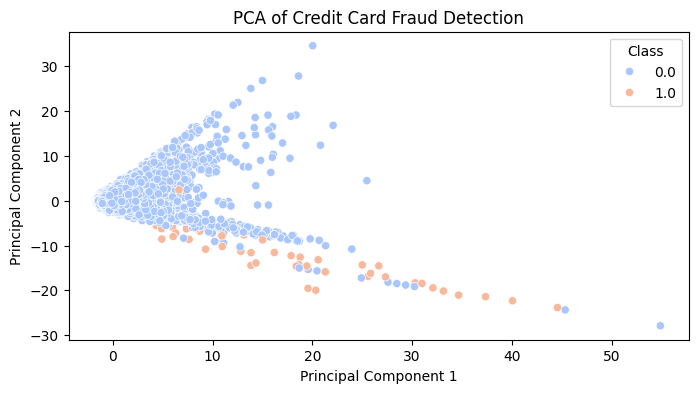

In [38]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test, palette='coolwarm', alpha=1.0)
plt.title('PCA of Credit Card Fraud Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()